In [35]:
from SafeTransformer import SafeTransformer

In [36]:
from sklearn.datasets import load_boston

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
surrogate_model = GradientBoostingRegressor(n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    loss='huber')

In [39]:
data = load_boston()

In [40]:
X = data['data']

In [41]:
y = data['target']

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pens = np.linspace(0.01, 10, 25)
best_score = float('Inf')
best_pen = 0
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_model_standard = LinearRegression()
linear_model_standard = linear_model_standard.fit(X_train, y_train)
standard_predictions = linear_model_standard.predict(X_test)
        

In [46]:
errors = []
surrogate_model = surrogate_model.fit(X_train, y_train)
for pen in pens:
    
    safe_transformer = SafeTransformer()

    safe_transformer = safe_transformer.fit(X_train, surrogate_model, penalty = pen)

    X_train_transformed = safe_transformer.transform(X_train)

    X_test_transformed = safe_transformer.transform(X_test)

    linear_model_transformed = LinearRegression()

    linear_model_transformed = linear_model_transformed.fit(X_train_transformed, y_train)

    surrogate_predictions = linear_model_transformed.predict(X_test_transformed)
    error = mean_squared_error(y_test, surrogate_predictions)
    errors.append(error)
    #print(mean_squared_error(y_test, standard_predictions), error)
    if error < best_score:
        best_score = error
        best_pen = pen

In [47]:
best_score

16.879254045583323

In [48]:
gb_predictions = surrogate_model.predict(X_test)
print(mean_squared_error(y_test, gb_predictions))

9.01088086125


In [49]:
import matplotlib.pyplot as plt

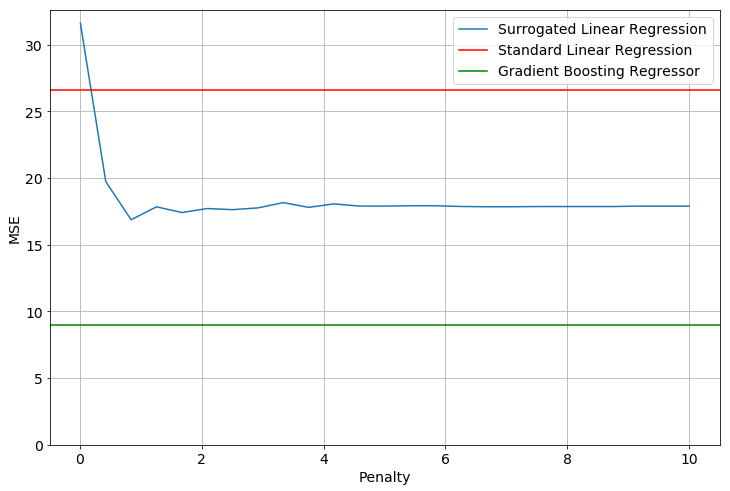

In [56]:
standard_error = mean_squared_error(y_test, standard_predictions)
xgb_error = mean_squared_error(y_test, gb_predictions)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 14})
plt.plot(pens, errors, label='Surrogated Linear Regression')
plt.xlabel('Penalty')
plt.ylabel('MSE')
plt.grid(True)
plt.axhline(standard_error, color='r', label='Standard Linear Regression')
plt.axhline(xgb_error, color='g', label='Gradient Boosting Regressor')
plt.ylim((0, max(errors)+1))
plt.legend()
plt.show()

In [57]:
best_pen

0.84250000000000003